In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df = pd.read_pickle("turtlebot_commands.pkl")

In [64]:
# rename columns to something more readible
column_map = { "cmd_vel__angular_z": "angular_cmd",
            "cmd_vel__linear_x": "linear_cmd",
            "odom__twist_twist_angular_z": "angular",
            "odom__twist_twist_linear_x": "linear"}
df = df.rename(index=str, columns=column_map)
df = df[list(column_map.values())]

In [65]:
df1 = df.iloc[:,:2]
df2 = df.iloc[:,2:]
df = df1.join(df2, how="outer")
df = df.dropna(how="all")
df = df.drop_duplicates()

In [66]:
for column in list(df.columns):
    df[column] = df[column].interpolate(method="pad")
df = df.dropna()            # drop any leftovers
df = df.drop_duplicates()

# Linear speed noise estimation

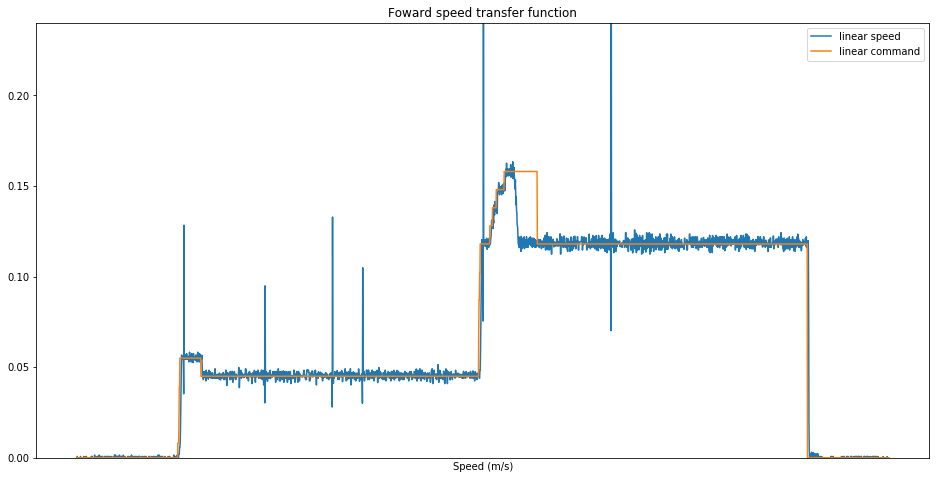

In [69]:
# this is the original values
plt.figure(figsize=(16,8))
plt.plot(df.linear[500:], label="linear speed")
plt.plot(df.linear_cmd[500:], label="linear command")
plt.legend()
plt.xlabel("Speed (m/s)")
plt.xticks([], [])
plt.ylim(0, 0.24)
plt.title("Foward speed transfer function")
plt.savefig("forward_speed_transfer_func.pdf")

([], <a list of 0 Text xticklabel objects>)

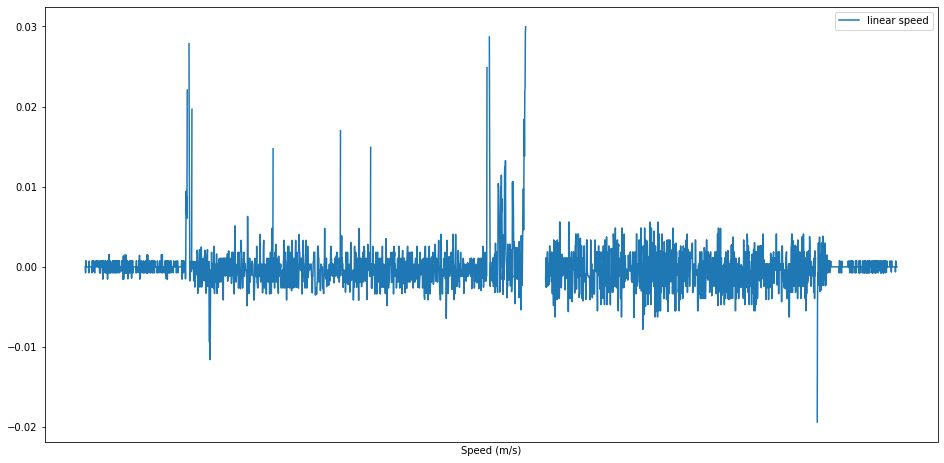

In [80]:
linear_error = df.linear_cmd - df.linear

# low pass filter
linear_error[np.abs(linear_error) > 0.03] = np.nan
linear_error.dropna()

# this is the noise
plt.figure(figsize=(16,8))
plt.plot(linear_error[500:], label="linear speed")
plt.legend()
plt.xlabel("Speed (m/s)")
plt.xticks([], [])

In [79]:
linear_error.describe()

count    3271.000000
mean       -0.000089
std         0.002462
min        -0.019355
25%        -0.001109
50%         0.000000
75%         0.000744
max         0.029958
dtype: float64

It looks like that the noise in linear velocity is 0.002462 m/s

# Angular velocity noise analysis

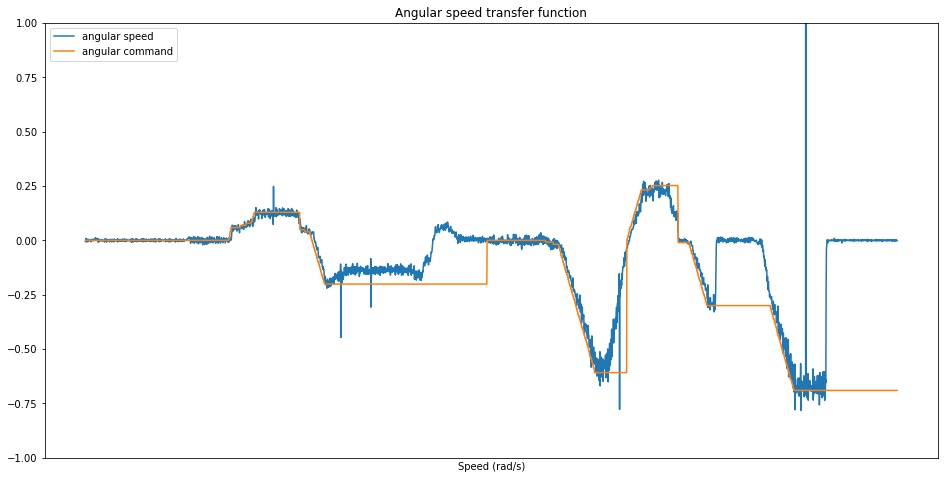

In [68]:
plt.figure(figsize=(16,8))
plt.plot(df.angular[500:], label="angular speed")
plt.plot(df.angular_cmd[500:], label="angular command")
plt.legend()
plt.xlabel("Speed (rad/s)")
plt.xticks([], [])
plt.ylim(-1, 1)
plt.title("Angular speed transfer function")
plt.savefig("angular_speed_transfer_func.pdf")

([], <a list of 0 Text xticklabel objects>)

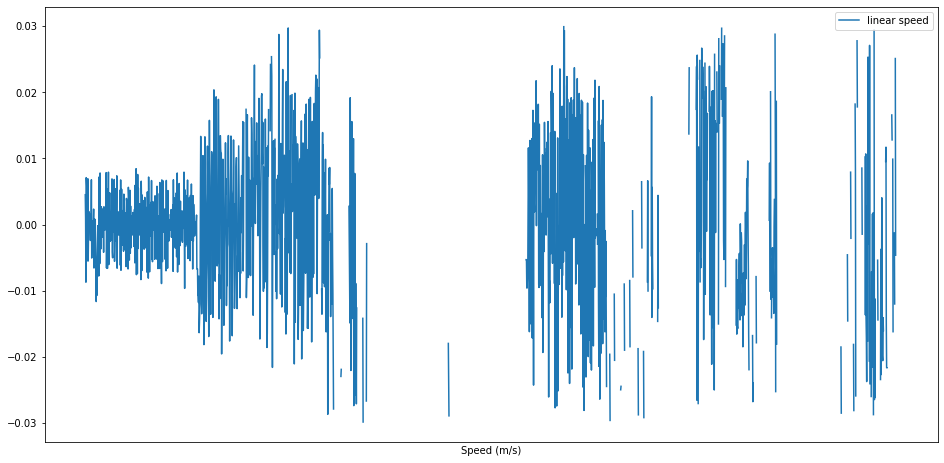

In [81]:
angular_error = df.angular_cmd - df.angular

# low pass filter
angular_error[np.abs(angular_error) > 0.03] = np.nan
angular_error.dropna()

# this is the noise
plt.figure(figsize=(16,8))
plt.plot(angular_error[500:], label="linear speed")
plt.legend()
plt.xlabel("Speed (m/s)")
plt.xticks([], [])

In [82]:
angular_error.describe()

count    1754.000000
mean       -0.000263
std         0.011749
min        -0.029972
25%        -0.007079
50%        -0.000147
75%         0.006648
max         0.029916
dtype: float64